In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
D:\ anaconda\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ anaconda\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ anaconda\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ anaconda\envs\python-cvcourse\lib\site-packages\t

In [2]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [3]:
image_shape = (150,150,3)

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# 13, because we have 13 classes_faces
model.add(Dense(15))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory('photos_train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')
test_image_gen = image_gen.flow_from_directory('photos_test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 745 images belonging to 15 classes.
Found 221 images belonging to 15 classes.


In [17]:
train_image_gen.class_indices

{'Akhmedov Sanzhar': 0,
 'Alikhan Zhamankhan': 1,
 'Baibatchayeva Anar': 2,
 'Dalabay Abylay': 3,
 'Daniyar Raiymbekov': 4,
 'Duisenov Alikhan': 5,
 'Kenzhebay Askar': 6,
 'Kyran Yerkin': 7,
 'Maxat Ualikhan': 8,
 'Naryshov Ernar': 9,
 'Rysmambetov Nurtugan': 10,
 'Sagynbek Nurbolat': 11,
 'Yerkin Yernar': 12,
 'Zhetessov Nur': 13,
 'Zhumabekov Magjan': 14}

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# 80% accuracy at 20 epochs
# 87% accuracy at 50 epochs
# 56% accuracy at 5 epochs
results = model.fit_generator(train_image_gen,epochs=50,
                              steps_per_epoch=50,
                              validation_data=test_image_gen,
                             validation_steps=13)

Epoch 1/50
50/50 [==============================] - 96s 2s/step - loss: 2.6482 - acc: 0.1157 - val_loss: 2.3933 - val_acc: 0.2217
Epoch 2/50
50/50 [==============================] - 82s 2s/step - loss: 2.1916 - acc: 0.3017 - val_loss: 1.9146 - val_acc: 0.3937
Epoch 3/50
50/50 [==============================] - 84s 2s/step - loss: 1.7615 - acc: 0.4523 - val_loss: 1.5623 - val_acc: 0.4932
Epoch 4/50
50/50 [==============================] - 110s 2s/step - loss: 1.5792 - acc: 0.5014 - val_loss: 1.4471 - val_acc: 0.4570
Epoch 5/50
50/50 [==============================] - 86s 2s/step - loss: 1.4359 - acc: 0.5549 - val_loss: 1.2476 - val_acc: 0.5973
Epoch 6/50
50/50 [==============================] - 66s 1s/step - loss: 1.3610 - acc: 0.5528 - val_loss: 1.0691 - val_acc: 0.6425
Epoch 7/50
50/50 [==============================] - 70s 1s/step - loss: 1.1693 - acc: 0.6188 - val_loss: 1.0770 - val_acc: 0.6244
Epoch 8/50
50/50 [==============================] - 88s 2s/step - loss: 1.0645 - acc: 0.6

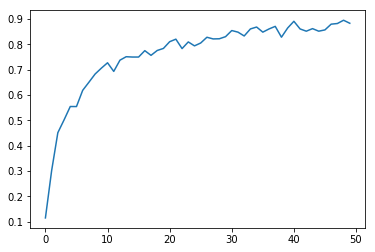

In [20]:
plt.plot(results.history['acc'])

In [21]:
model.save('faсe_recog50epochs.h5')